##1. Know Your Data

In [174]:
# Import Libraries

## Data handling libraries

import pandas as pd
import numpy as np
from scipy import stats
import math
import random
import sklearn

## Data visualisation libraries

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings('ignore')

import missingno as msno
from wordcloud import WordCloud, STOPWORDS

## Importing necessary libraries for creating recommendation stystem

from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

#NLP libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


##Dataset Loading

In [175]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/bluebash/train.csv",delimiter=",", encoding='utf-8')

##Dataset First View

In [176]:
df.head(3)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield


##Dataset Rows & Columns count

In [177]:
df.shape

(37500, 19)

##Dataset Information

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

##Duplicate Values

In [179]:
df.duplicated().sum()

0

No any duplicate value is present in the dataset.

##Missing Values

<Axes: >

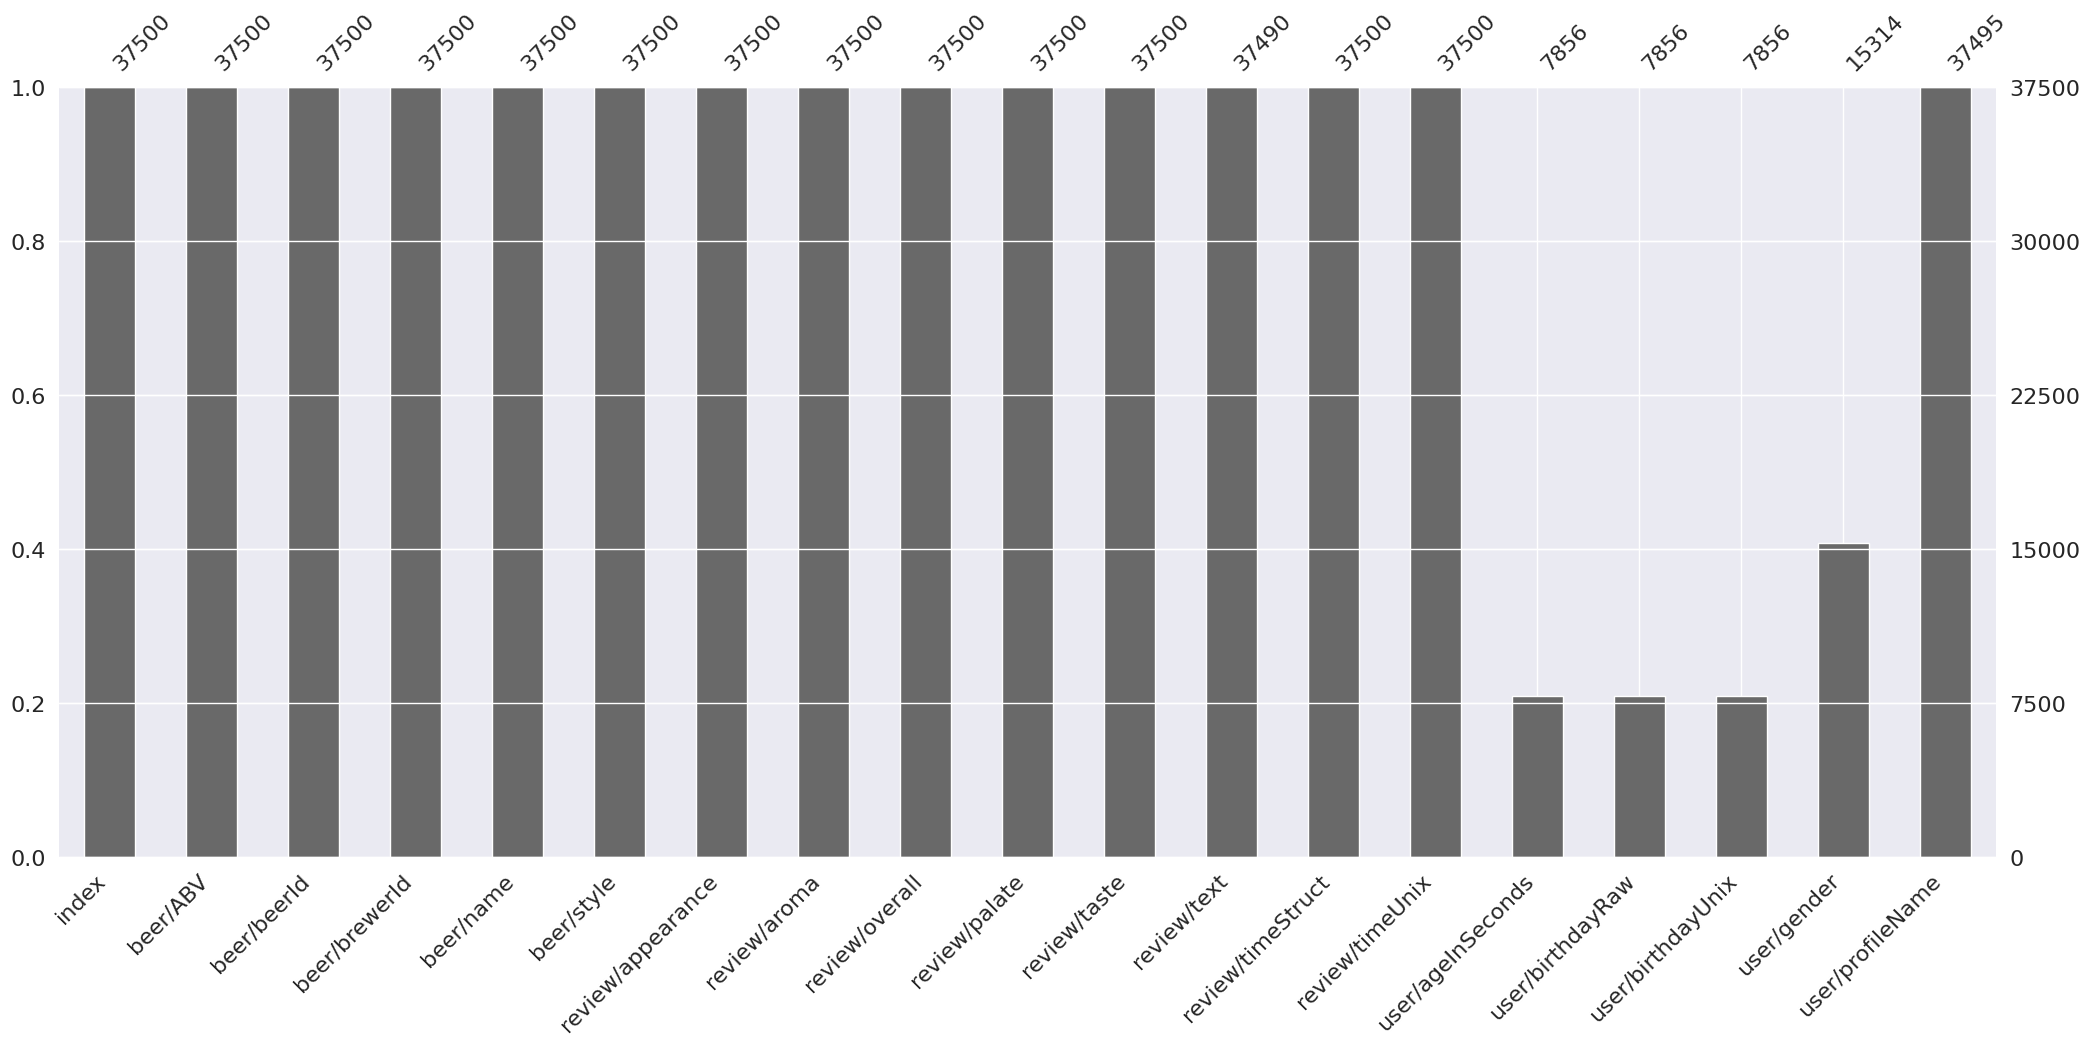

In [180]:

# Missing Values/Null Values Count
df.isna().sum()


# Visualizing the missing values
plt.figure(figsize=(7,3))
msno.bar(df)

What did you Know about your dataset

##**2. Understanding Your Variables**

###Variables Description

In [181]:
# Dataset Describe

df.describe(include='all')

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
count,37500.000000,37500.000000,37500.000000,37500.000000,37500,37500,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,37490,37500,3.750000e+04,7.856000e+03,7856,7.856000e+03,15314,37495
unique,NaN,NaN,NaN,NaN,1688,95,NaN,NaN,NaN,NaN,NaN,37482,37490,NaN,NaN,1432,NaN,2,7441
top,NaN,NaN,NaN,NaN,Founders Breakfast Stout,American Double / Imperial Stout,NaN,NaN,NaN,NaN,NaN,"The beer has a bit of a reddish color to it, w...","{'min': 0, 'hour': 0, 'mday': 10, 'sec': 1, 'y...",NaN,NaN,"Sep 14, 1980",NaN,Male,northyorksammy
freq,NaN,NaN,NaN,NaN,1883,4495,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,76,NaN,15069,141
mean,24951.887573,7.403725,21861.152027,3036.595120,NaN,NaN,3.900053,3.873240,3.88944,3.854867,3.922440,NaN,NaN,1.232794e+09,1.176705e+09,NaN,2.416303e+08,NaN,NaN
std,14434.009669,2.318145,18923.130832,5123.084675,NaN,NaN,0.588778,0.680865,0.70045,0.668068,0.716504,NaN,NaN,7.190955e+07,3.375514e+08,NaN,3.375514e+08,NaN,NaN
min,0.000000,0.100000,175.000000,1.000000,NaN,NaN,0.000000,1.000000,0.00000,1.000000,1.000000,NaN,NaN,9.262944e+08,7.034366e+08,NaN,-2.208960e+09,NaN,NaN
25%,12422.500000,5.400000,5441.000000,395.000000,NaN,NaN,3.500000,3.500000,3.50000,3.500000,3.500000,NaN,NaN,1.189194e+09,9.794810e+08,NaN,1.433628e+08,NaN,NaN
50%,24942.500000,6.900000,17538.000000,1199.000000,NaN,NaN,4.000000,4.000000,4.00000,4.000000,4.000000,NaN,NaN,1.248150e+09,1.100009e+09,NaN,3.183264e+08,NaN,NaN
75%,37416.750000,9.400000,34146.000000,1315.000000,NaN,NaN,4.500000,4.500000,4.50000,4.500000,4.500000,NaN,NaN,1.291330e+09,1.274973e+09,NaN,4.388544e+08,NaN,NaN


1. index - an identifier for the review, removing this column and setting it default from first index.
2. beer/ABV - the alcohol by volume of the beer, mean slightly higher than median, slightly positively skewed distribution.
3. beer/beerId - a unique ID indicating the beer reviewed
4. beer/brewerId - a unique ID indicating the brewery
5. beer/name - name of the beer, 1688 unique beer available, maximum records belongs to 'Founders Breakfast Stout'
6. beer/style - 95 unique beer style available, maximum records belongs to 'American Double / Imperial Stout'
7. review/appearance - rating of the beer's appearance (1.0 to 5.0), normal distribution mean and median approximately equal
8. review/aroma - rating of the beer's aroma (1.0 to 5.0),normal distribution mean and median approximately equal
9. review/overall - rating of the beer overall (1.0 to 5.0), normal distribution mean and median approximately equal
10. review/palate - rating of the beer's palate (1.0 to 5.0), normal distribution mean and median approximately equal
11. review/taste - rating of the beer's taste (1.0 to 5.0), normal distribution mean and median approximately equal
12. review/text - the text of the review, 8 missing values should be dropped
13. review/timeStruct - a dict specifying when the review was submitted,
14. review/timeUnix -
15. user/ageInSeconds - age of the user in seconds,  Need to deep dive to check if there is any pattern in data missingness, contains only 20% of the records hence this column should be dropped
16. user/birthdayRaw,  Need to deep dive to check if there is any pattern in data missingness, contains only 20% of the records hence this column should be dropped
17. user/birthdayUnix,   Need to deep dive to check if there is any pattern in data missingness,contains only 20% of the records hence this column should be dropped
18. user/gender - gender of the user (if specified), Need to deep dive to check if there is any pattern in data missingness, contains only 50% of the records hence this column should be dropped
19. user/profileName - profile name of the user, 7441 unique users are there, northyorksammy has submitted most out of them, 141 reviews

###3. Data Wrangling

1. First, let's reset index of our dataframe

In [182]:
df.drop(columns='index',inplace=True)

###4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [183]:
# 1. Univariate Analysis

In [184]:
# Chart - 1 visualization code for plotting histogram of contineous variables

In [185]:
def distr(DF,x,n_bins=10):

  ''' This function gives univariate distribution of contineous variable in the form of Histogram '''

  legend = ['distribution']

  # Creating histogram
  fig, axs = plt.subplots(1, 1,
                          figsize =(6,3),
                          tight_layout = True)


  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      axs.spines[s].set_visible(False)

  # Remove x, y ticks
  axs.xaxis.set_ticks_position('none')
  axs.yaxis.set_ticks_position('none')

  # Add padding between axes and labels
  axs.xaxis.set_tick_params(pad = 5)
  axs.yaxis.set_tick_params(pad = 10)

  # Add x, y gridlines
  axs.grid( color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.6)
  kur = round(DF[x].kurt(),2)
  ske = round(DF[x].skew(),2)
  # Add Text watermark
  fig.text(0.9, 0.75, 'Kurtosis: '+str(kur)+' & Skewness: '+str(ske),
          fontsize = 14,
          color ='black',
          ha ='right',
          va ='bottom',
          alpha = 1.0)

  # Creating histogram
  N, bins, patches = axs.hist(DF[x], bins = n_bins)

  # Setting color
  fracs = ((N**(1 / 5)) / N.max())
  norm = colors.Normalize(fracs.min(), fracs.max())

  for thisfrac, thispatch in zip(fracs, patches):
      color = plt.cm.viridis(norm(thisfrac))
      thispatch.set_facecolor(color)

  # Adding extra features
  plt.xlabel(x,size=14)
  plt.ylabel("Count",size=14)
  plt.legend(legend)
  plt.title('Distribution Of '+x,size=16)

  # Show plot
  plt.show()

In [186]:
# This function gives five point summary of the variable


def five_point_summary(df_name,column_name):
  output = {
      "minimum":df_name[column_name].min(),
      "quantile_1":df_name[column_name].quantile(0.25),
      "median":df_name[column_name].quantile(0.50),
      "quantile_3":df_name[column_name].quantile(0.75),
      "maximum":df_name[column_name].max(),
      "top_5_%":df_name[column_name].quantile(0.95),

  }
  return output

In [187]:
# This function gives quantity of outliers in the dataset attributes


def outlier_per(df,x):

  '''this function gives number of outliers present in the feature by using IQR method'''

  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)
  iqr = q3-q1
  lw = q1 - (1.5*iqr)
  uw = q3 + (1.5*iqr)

  cnt = 0
  for i in df[x]:
    if (i>uw):
      cnt+=1
    elif(i<lw):
      cnt+=1
  strng = f'{round(cnt*100/len(df),2)} % Outliers present in column {x} which is {cnt} in number'
  strng2 = f'mean: {round(df[x].mean(),2)}'
  strng3 = f'median: {round(df[x].median(),2)}'
  strng4 = f'minimum: {round(df[x].min(),2)}'
  strng5 = f'maximum: {round(df[x].max(),2)}'
  strng6 = f'kurtosis: {round(df[x].kurt(),2)}'
  strng7 = f'skewness: {round(df[x].skew(),2)}'
  lwv = f'lower whisker: {round(lw,2)}'
  uwv = f'upper whisker: {round(uw,2)}'

  return(strng,strng2,strng3,strng4,strng5,strng6,strng7,lwv,uwv)

In [188]:
from pandas.core.dtypes.cast import Sized
# Chart - 4 visualization code of bar chart

def barplot_fun(size,Data,X,Y,col='deepskyblue'):
    '''This function returns barplot for particular variable'''

    plt.figure(figsize=size)

    sns.set(style="whitegrid", color_codes=True)
    plots = sns.barplot(x=X, y=Y, data=Data,color=col)
    plots.set_xticklabels(plots.get_xticklabels(), rotation=30, ha="right",size=12)

    # Iterating over the bars one-by-one
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                      size=14, xytext=(0, 8),
                      textcoords='offset points')

    # Setting the label for x-axis
    plt.xlabel(X, size=14)

    # Setting the label for y-axis
    plt.ylabel(Y, size=14)

    # Setting the title for the graph
    plt.title(X+" Distribution",size=16)

    # Finally showing the plot
    plt.show()


##***1. Distribution of Beer Attributes:***

***Q1 . Give distribution of alocohol values of the beer?? Give top 5 beers with highest volume of alcohol.***

In [189]:
# Top 5 beers w.r.t ABV

top_5_values_indices = df['beer/ABV'].nlargest(5).index
top_5_values = df.loc[top_5_values_indices]

# Print or use the top 5 values
top_5_values

,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
33166,57.70,73368,6513,SchorschbrÃ¤u Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,3.5,"New world strongest beer. Very limited, only 3...","{'min': 28, 'hour': 12, 'mday': 23, 'sec': 21,...",1316780901,NaN,NaN,NaN,NaN,kappldav123
22617,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,4.5,"The bottle looks really great, handnumbered an...","{'min': 23, 'hour': 19, 'mday': 21, 'sec': 18,...",1274469798,NaN,NaN,NaN,NaN,kappldav123
25416,43.00,57856,6513,SchorschbrÃ¤u Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,4.0,43% ABV - this is so crazy!\t\tA: Pour is warm...,"{'min': 42, 'hour': 17, 'mday': 6, 'sec': 58, ...",1309974178,NaN,NaN,NaN,NaN,Sunnanek
6436,39.44,55712,6513,SchorschbrÃ¤u Schorschbock 40%,Eisbock,3.5,3.5,3.0,3.5,3.5,Very lucky to get a 2oz sample of this at a ta...,"{'min': 8, 'hour': 20, 'mday': 23, 'sec': 14, ...",1274645294,1.200406e+09,"Nov 27, 1976",217929600.0,Male,thepeter
36202,30.86,51466,6513,SchorschbrÃ¤u Schorschbock 31%,Eisbock,4.0,4.0,3.5,4.0,4.5,Bottle @ home (of course not the whole bottle ...,"{'min': 58, 'hour': 12, 'mday': 28, 'sec': 56,...",1248785936,NaN,NaN,NaN,NaN,kappldav123


1. Top 5 beers with respect to absolute values contains maximum of 57.70 % of alcohol and minimum of 30 % of alcohol.
2. As per our dataset top beers in terms of alcohol volume belongs to Eisbock style.
2. User 'kappldav123' has tested and gave reviews for most of the top beer.



In [190]:
five_point_summary(df_name=df,column_name='beer/ABV')

{'minimum': 0.1,
 'quantile_1': 5.4,
 'median': 6.9,
 'quantile_3': 9.4,
 'maximum': 57.7,
 'top_5_%': 11.2}

4. only top 5 % of beer with respect to ABVolume contains more than 11% of alcohol

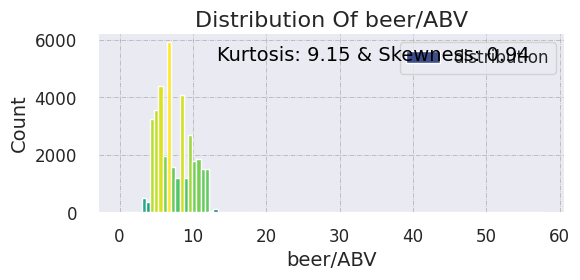

In [191]:
distr(DF=df[df['beer/ABV']<60],x='beer/ABV',n_bins=100)

5. Distribution is highly positively skewed due to this top ABV records. Need to boxplot this variable and check outlier % with IQR values.

('0.03 % Outliers present in column beer/ABV which is 12 in number',
 'mean: 7.4',
 'median: 6.9',
 'minimum: 0.1',
 'maximum: 57.7',
 'kurtosis: 9.15',
 'skewness: 0.94',
 'lower whisker: -0.6',
 'upper whisker: 15.4')

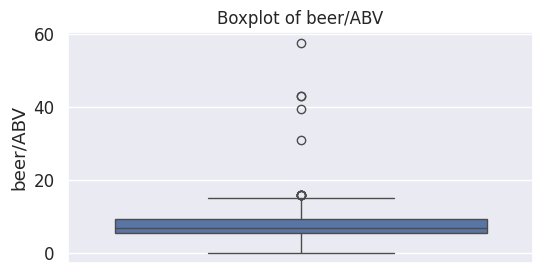

In [192]:
plt.figure(figsize=(6,3))
sns.boxplot(df['beer/ABV'])
plt.title('Boxplot of beer/ABV',size=12)
outlier_per(df=df,x='beer/ABV')

***Q2 . What is the distribution of beer styles?***

1. 95 unique beer style reviews are available.
2. American Double / Imperial Stout has highest 4495 reviews.
3. Followed by American IPA (3050), American Double / Imperial IPA     (2872) , Scotch Ale / Wee Heavy (2133), Russian Imperial Stout      
(2032)

4. Below chart gives top 10 beer styles which has highest reviews submitted

In [193]:
top_10_styles = df['beer/style'].value_counts().head(10)
top_10_styles_df = top_10_styles.reset_index()
top_10_styles_df.columns = ['beer/style', 'review_count']

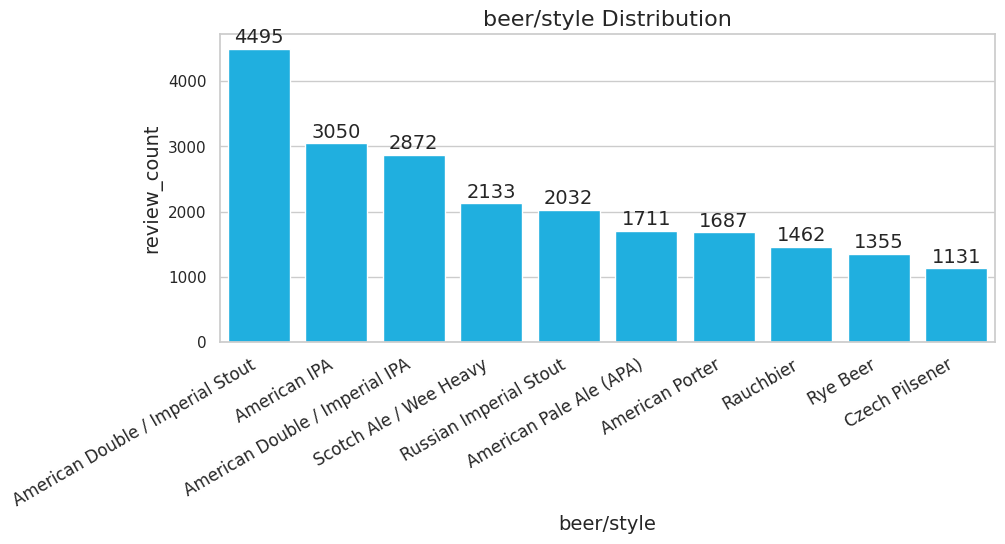

In [194]:
barplot_fun(size=(10,4),Data=top_10_styles_df,X='beer/style',Y='review_count',col='deepskyblue')

***Q3 . Which breweries have the most reviewed beers?***

1. Below chart gives top 10 breweris which has most number of reviewed beers
2. BrewerID 1199 tops the list with 123 unique beers, followed by brewerID 26, with 115 unique beers

In [195]:
df_brewery = df[["beer/brewerId",	"beer/name"]]
df_brewery.drop_duplicates(inplace=True)
df_brewery = df_brewery.groupby(by="beer/brewerId")["beer/name"].count().reset_index()
df_brewery = df_brewery.sort_values(by='beer/name',ascending=False)
df_brewery = df_brewery.head(10).reset_index()
df_brewery = df_brewery[["beer/brewerId",	"beer/name"]]

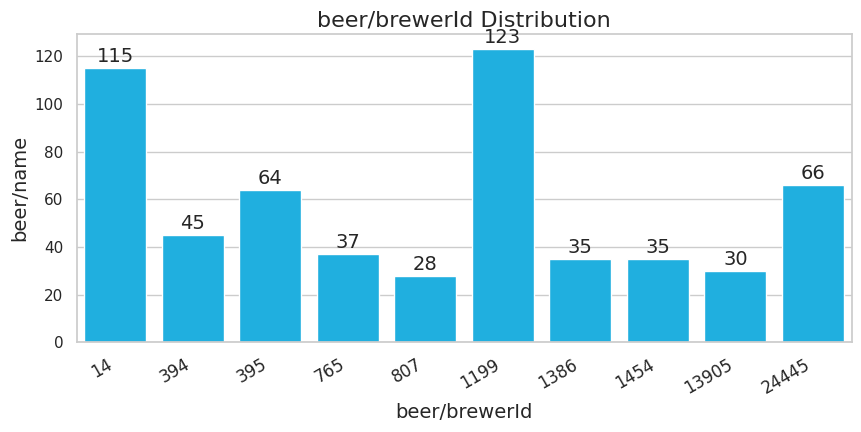

In [196]:
barplot_fun(size=(10,4),Data=df_brewery,X='beer/brewerId',Y='beer/name',col='deepskyblue')

##***2. Review Ratings:***

***Q4 . What are the distributions of review ratings for appearance, aroma, overall, palate, and taste?***

1. Review of appearence

In [197]:
def value_count(Data,X):

    ''' This code returns datframe with value counts'''

    out = pd.DataFrame(Data[X].value_counts().reset_index())
    out.rename(columns = {'index':X,X:'count'}, inplace = True)
    return(out)

In [198]:
df_appearence = value_count(Data=df,X='review/appearance')
df_appearence

,review/appearance,count
0,4.0,16058
1,4.5,7597
2,3.5,7224
3,3.0,3396
4,5.0,1862
5,2.5,807
6,2.0,437
7,1.5,84
8,1.0,34
9,0.0,1


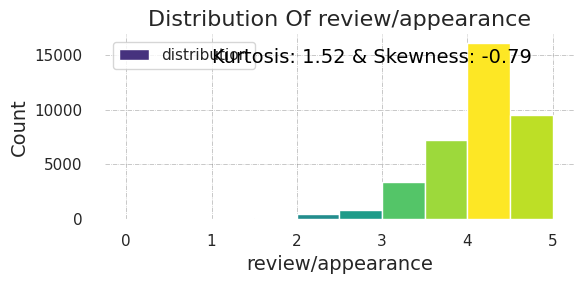

In [199]:
distr(DF=df,x='review/appearance',n_bins=10)

- Distribution of appearence review is highly negatively skewed
- Around 65% of peoples rated above 4 out of 5 to all the available beers in the dataset.

2. Review of aroma

In [200]:
df_aroma = value_count(Data=df,X='review/aroma')
df_aroma

,review/aroma,count
0,4.0,13034
1,4.5,8407
2,3.5,7473
3,3.0,3855
4,5.0,2579
5,2.5,1094
6,2.0,773
7,1.5,195
8,1.0,90


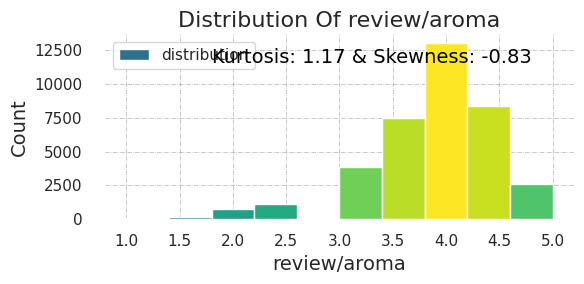

In [201]:
distr(DF=df,x='review/aroma',n_bins=10)

- Distribution of aroma review is also highly negatively skewed
- Around 65% of peoples rated above 4 out of 5 to all the available beers in the dataset.
- Histogram is quite similar to review of appearence.

3. Review Palette

In [202]:
df_palate = value_count(Data=df,X='review/palate')
df_palate

,review/palate,count
0,4.0,14606
1,4.5,7225
2,3.5,7082
3,3.0,4007
4,5.0,2422
5,2.5,1161
6,2.0,709
7,1.5,189
8,1.0,99


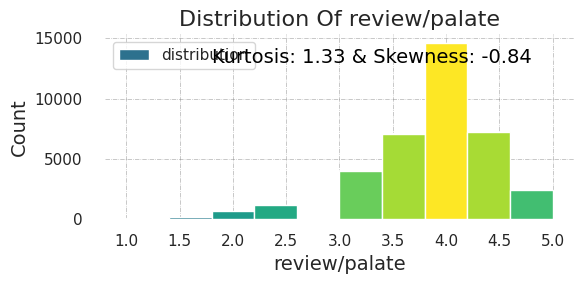

In [203]:
distr(DF=df,x='review/palate',n_bins=10)

- Distribution of palate review is also highly negatively skewed
- Around 65% of peoples rated above 4 out of 5 to all the available beers in the dataset.
- Histogram is quite similar to review of appearence and aroma both.

4. Review of taste

In [204]:
df_taste = value_count(Data=df,X='review/taste')
df_taste

,review/taste,count
0,4.0,12381
1,4.5,9684
2,3.5,6577
3,5.0,3259
4,3.0,3141
5,2.5,1232
6,2.0,817
7,1.5,258
8,1.0,151


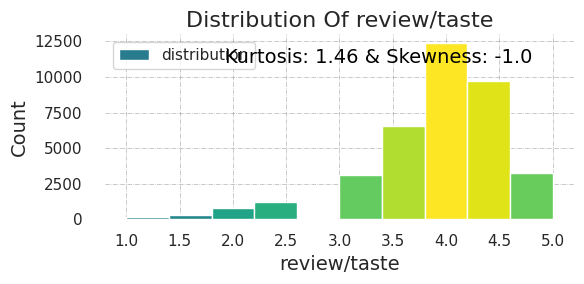

In [205]:
distr(DF=df,x='review/taste',n_bins=10)

- Distribution of taste review is also highly negatively skewed
- Around 65% of peoples rated above 4 out of 5 to all the available beers in the dataset.
- Histogram is quite similar to review of appearence,aroma and palate.

5. Overall Review

In [206]:
df_overall = value_count(Data=df,X='review/overall')
df_overall

,review/overall,count
0,4.0,13868
1,4.5,8666
2,3.5,6551
3,3.0,3319
4,5.0,2671
5,2.5,1193
6,2.0,807
7,1.5,248
8,1.0,176
9,0.0,1


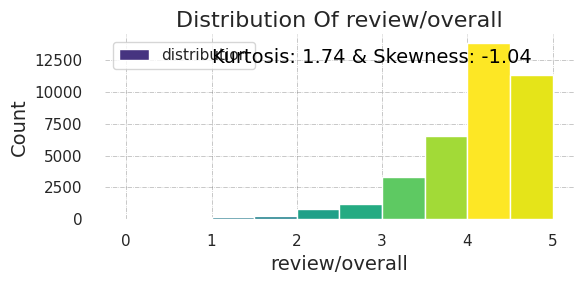

In [207]:
distr(DF=df,x='review/overall',n_bins=10)

- Distribution of overall review is also highly negatively skewed
- Around 65% of peoples rated above 4 out of 5 to all the available beers in the dataset.
- Histogram is quite similar to review of appearence,aroma and palate and taste.

***Q5 . Are there any correlations between different review ratings?***

In [208]:
df_review = df[['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste']]

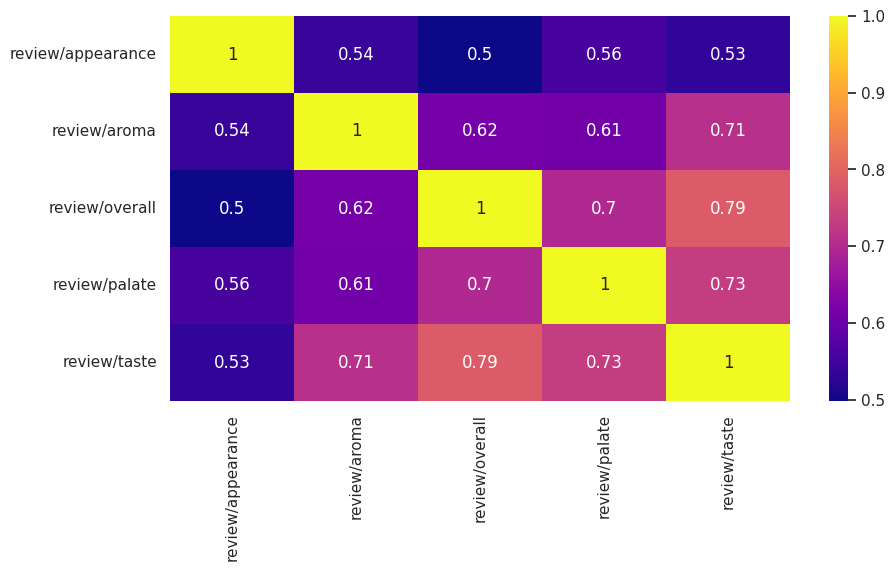

In [209]:
# Correlation Heatmap of review attributes

plt.figure(figsize = (10,5))
colormap = plt.cm.plasma
sns.heatmap(df_review.corr(),cmap = colormap,annot=True);
sns.set(font_scale=1.1)

plt.show()

All review variants has more than 50 % of positive correaltion with one another, which tells us that all ratings are some how shares relation, which varifies our hypothesis of relationship also.

***Q6 . Which beer has the highest overall rating??***

In [210]:
df[(df['review/overall']==5) & (df['review/taste']==5) & (df['review/aroma']==5) & (df['review/palate']==5) & (df['review/appearance']==5)]["beer/name"].unique()

array(['Founders Backwoods Bastard',
       'Founders KBS (Kentucky Breakfast Stout)',
       'B.O.R.I.S. The Crusher Oatmeal-Imperial Stout',
       'Founders Nemesis 2010', 'Pilsner Urquell',
       'Aecht Schlenkerla Rauchbier MÃ¤rzen', 'Founders Double Trouble',
       'Weltenburger Kloster Asam-Bock', 'Founders Breakfast Stout',
       'Founders CBS Imperial Stout', 'Founders Harvest Ale',
       "Founders Red's Rye PA", 'Aecht Schlenkerla Rauchbier Urbock',
       'Founders Porter', 'Smoke (Smoked Porter)', 'Killer Bee',
       "Stoudt's Abbey Triple (750ml Release)", 'Founders Nemesis 2009',
       'Mean Manalishi Double I.P.A.', 'Sue', 'Founders Dirty Bastard',
       "Stoudt's Fat Dog (Imperial Oatmeal Stout)",
       'D.O.R.I.S. The Destroyer Double Imperial Stout',
       'Terminal Gravity IPA', "Stoudt's Gold Lager",
       'Founders Blushing Monk', 'The Audacity Of Hops',
       'Pike Entire - Wood Aged Stout', 'Founders Imperial Stout',
       'Founders Deca 10th Annivers

Above beers has recieved highest overall ratings

##***3. User Information:***

***Q7 . What is the distribution of user ages (after converting seconds or Unix time to years)?***

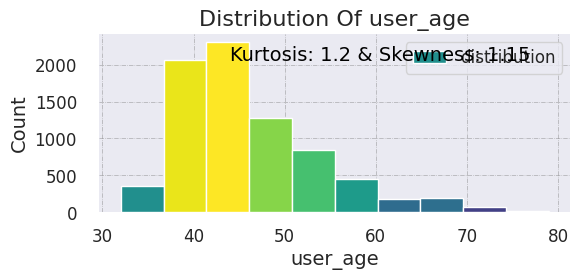

In [211]:
df['user/birthday'] = pd.to_datetime(df['user/birthdayUnix'], unit='s')

# Then, calculate the age of the users based on their birthdate
current_year = pd.Timestamp.now().year
df['user_age'] = current_year - df['user/birthday'].dt.year

distr(DF=df[df['user_age']<80],x='user_age',n_bins=10)

Most of the users are below 80 years old, with avergae of 40 years old.

***Q8 . How many unique users are there in the dataset?***

In [212]:
unique_users = df['user/profileName'].nunique()

print("Number of unique users:", unique_users)

Number of unique users: 7441


***Q9 . Is there any relationship between user gender and their review ratings??***

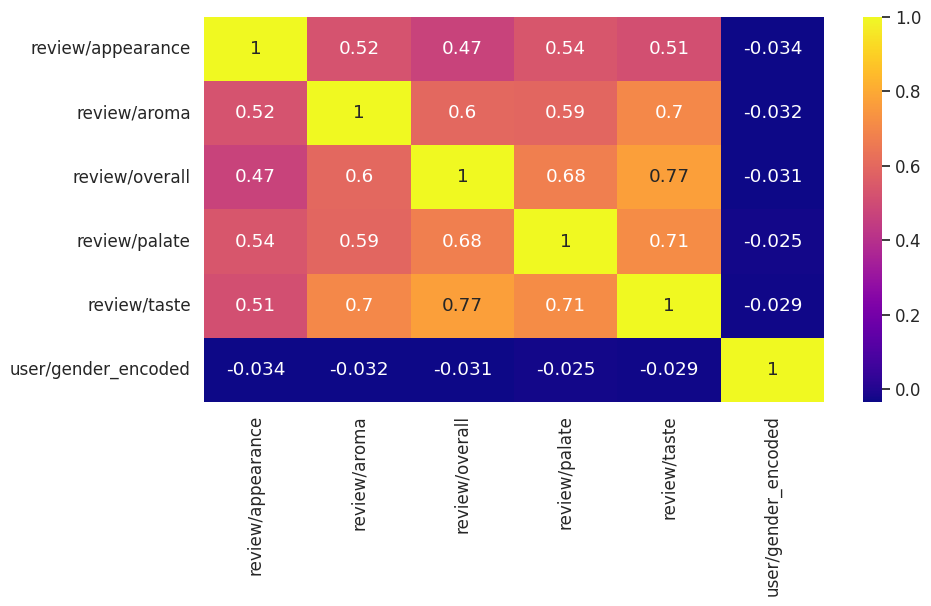

In [213]:
df_gender = df[df['user/gender'] != np.NaN]
df_gender = df_gender.dropna()
df_gender['user/gender_encoded'] = df_gender['user/gender'].replace({'Male': 1, 'Female': 0})
df_gender = df_gender[['review/appearance', 'review/aroma', 'review/overall', 'review/palate',
       'review/taste','user/gender_encoded']]

# Correlation Heatmap of review attributes

plt.figure(figsize = (10,5))
colormap = plt.cm.plasma
sns.heatmap(df_gender.corr(),cmap = colormap,annot=True);
sns.set(font_scale=1.1)

plt.show()

There is no any relationship in between user gender and reviews

##***4. Text Analysis:***

***Q10 . What are the most common words/phrases used in beer reviews?***

In [214]:
df['review/text'] = df['review/text'].fillna('')

# Concatenate all review texts into a single string
all_reviews = ' '.join(df['review/text'])

# Tokenize the text into words
tokens = word_tokenize(all_reviews)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_tokens)

# Print the 10 most common words/phrases
for i in word_freq.most_common(10):
  print(i)

('beer', 46967)
('head', 36402)
('taste', 26155)
('nice', 24583)
('good', 23025)
('malt', 22016)
('like', 21409)
('hops', 21093)
('one', 20811)
('sweet', 20231)


***Q11 . Can we identify positive or negative sentiment in the review texts?***

In [215]:
# Create an instance of the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply the sentiment analyzer to each review text
df['sentiment_scores'] = df['review/text'].apply(lambda text: sid.polarity_scores(text))

# Extract the compound sentiment score (overall sentiment) from the dictionary
df['compound_score'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

In [216]:
# Classify the reviews as positive, negative, or neutral based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score > 0.3 else ('negative' if score < 0 else 'neutral'))

# Print the DataFrame with the sentiment scores and classification
df[['review/text', 'sentiment_scores', 'compound_score', 'sentiment']].head(4)

,review/text,sentiment_scores,compound_score,sentiment
0,Pours a clouded gold with a thin white head. N...,"{'neg': 0.095, 'neu': 0.82, 'pos': 0.085, 'com...",0.0258,neutral
1,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'neg': 0.104, 'neu': 0.701, 'pos': 0.195, 'co...",0.9390,positive
2,First enjoyed at the brewpub about 2 years ago...,"{'neg': 0.0, 'neu': 0.83, 'pos': 0.17, 'compou...",0.8175,positive
3,First thing I noticed after pouring from green...,"{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'comp...",0.8625,positive


In [217]:
sentiment_df = pd.DataFrame(df['sentiment'].value_counts())
sentiment_df.reset_index(inplace=True)
sentiment_df.head(3)

,index,sentiment
0,positive,33833
1,negative,2509
2,neutral,1158


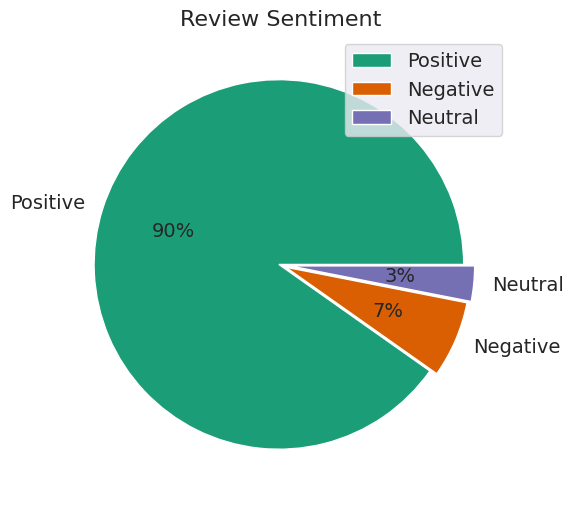

In [218]:
## Pie Chart
plt.figure(figsize=(14, 6))

data = sentiment_df['sentiment']
keys = sentiment_df['index']

# declaring exploding pie
explode = [0.01,0.03,0.05]
# define Seaborn color palette to use
palette_color = sns.color_palette('Dark2')

# plotting data on chart
plt.pie(data, labels=['Positive','Negative','Neutral'], colors=palette_color,explode=explode,autopct='%.0f%%',textprops={'fontsize': 14})


plt.legend(fontsize=14)

plt.title("Review Sentiment",size=16)
# displaying chart
plt.show()

***Q12 . Are there any correlations between review text length and review ratings?***

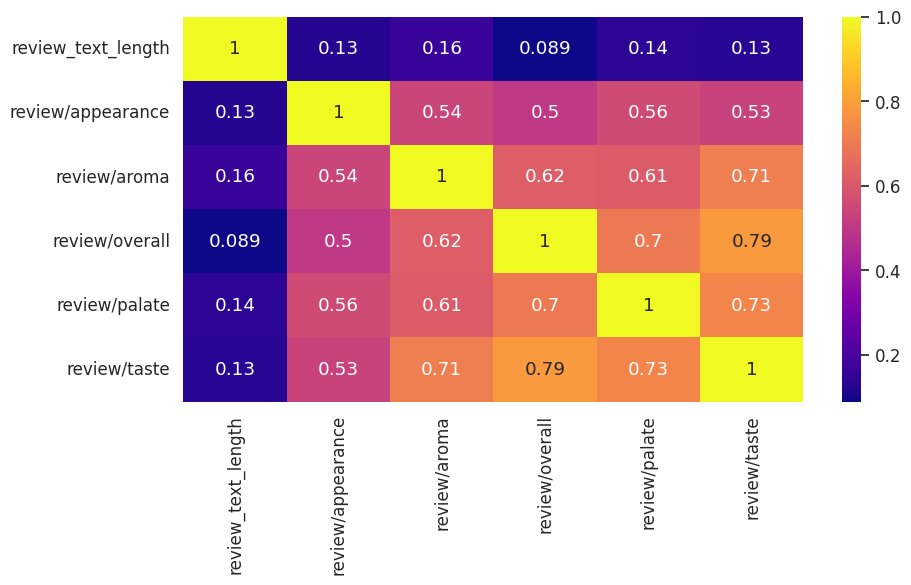

In [219]:
df['review_text_length'] = df['review/text'].apply(len)

# Compute the correlation coefficients
df_review_text = df[['review_text_length', 'review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste']].corr()

# Print the correlation coefficients
# Correlation Heatmap of review attributes

plt.figure(figsize = (10,5))
colormap = plt.cm.plasma
sns.heatmap(df_review_text,cmap = colormap,annot=True);
sns.set(font_scale=1.1)

plt.show()


No correlation between review text legnth and ratings

##***5. Temporal Analysis:***

***Q13 . How have review counts changed over time?***

***Q14 . Are there any trends?***

***Q15 . Is there any seasonal variation in review ratings or review counts?***

In [220]:
import ast

# Assuming df is your DataFrame

# Convert the 'review/timeStruct' column into a pandas Series of dictionaries
time_struct_series = df['review/timeStruct'].apply(ast.literal_eval)

# Extract the datetime information from the dictionaries
# Create a new datetime series
datetime_series = time_struct_series.apply(lambda x: pd.Timestamp(year=x['year'], month=x['mon'], day=x['mday'], hour=x['hour'], minute=x['min'], second=x['sec']))

# Assign the converted datetime series back to the DataFrame
df['review_time'] = datetime_series
df['review_time'] = pd.to_datetime(df['review_time'])

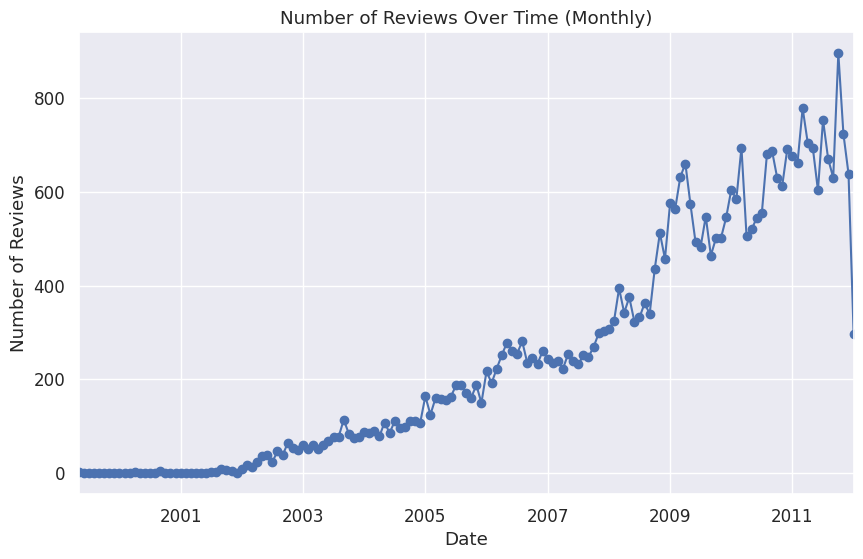

In [221]:
# Set 'review_time' column as the index
df.set_index('review_time', inplace=True)

# Resample on a monthly basis and count the number of reviews per month
monthly_reviews = df.resample('M').size()

# Plot the line plot
plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind='line', marker='o', color='b')
plt.title('Number of Reviews Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

1. Review counts have been increased exponentially over the period of time.
2. Above line graph shows it has increased from minimal value to 900 reviews per month over the period of 10 years.
3. Apart from that in cold months of year review count is comparatively less as compared to hot months of the year. So we can say it has seasonality and increasing bullish trend both.

##***6. User Engagement:***

***Q16 . What is the distribution of the number of reviews per user?***

In [222]:
reviews_per_user = df.groupby('user/profileName').size()
reviews_per_user = reviews_per_user.reset_index()
reviews_per_user.rename(columns={0:'No. of reviews per user'},inplace=True)
reviews_per_user.head(3)

,user/profileName,No. of reviews per user
0,0110x011,2
1,05Harley,5
2,0tt0,1


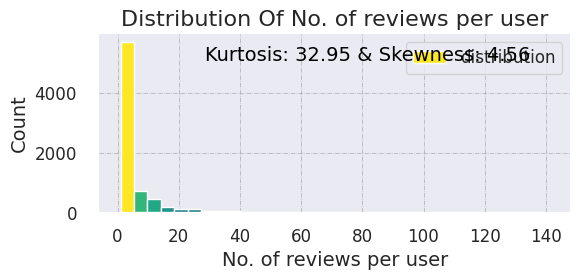

In [223]:
distr(DF=reviews_per_user,x='No. of reviews per user',n_bins=32)

In [224]:
five_point_summary(df_name=reviews_per_user,column_name='No. of reviews per user')

{'minimum': 1,
 'quantile_1': 1.0,
 'median': 2.0,
 'quantile_3': 5.0,
 'maximum': 141,
 'top_5_%': 20.0}

Top 5% users submitted, 20+ reviews per head.

Text(0.5, 1.0, 'No. of reviews per user')

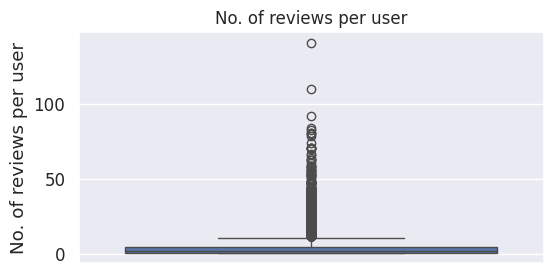

In [225]:
plt.figure(figsize=(6,3))
sns.boxplot(reviews_per_user['No. of reviews per user'])
plt.title('No. of reviews per user',size=12)
# outlier_per(df=reviews_per_user,x=['No. of reviews per user'])

***Q17 . Are there any super users who provide a disproportionately large number of reviews?***

In [226]:
outlier_per(df=reviews_per_user,x='No. of reviews per user')

('11.24 % Outliers present in column No. of reviews per user which is 836 in number',
 'mean: 5.04',
 'median: 2.0',
 'minimum: 1',
 'maximum: 141',
 'kurtosis: 32.95',
 'skewness: 4.56',
 'lower whisker: -5.0',
 'upper whisker: 11.0')

There are around 836 super users present whom submitted more reviews than upper whisker value.